# Бизнес Показатели

В нашем примере мы будем использовать образец набора данных интернет-магазина https://www.kaggle.com/vijayuv/onlineretail. Для интернет-магазина в качестве таргета выберем ежемесячный доход.

**Признаки**
 
- Номер счета
- Код продажи
- Описание
- Количество
- Дата продажи
- Цена за единицу
- Идентификатор покупателя
- Страна


## Ежемесячный Доход

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division

In [ ]:
df = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
print(df.isna().sum())
print('Дубликаты', df.duplicated().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Дубликаты 5268


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,201112
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,201112
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,201112
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,201112
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,201112


In [ ]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']
df_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


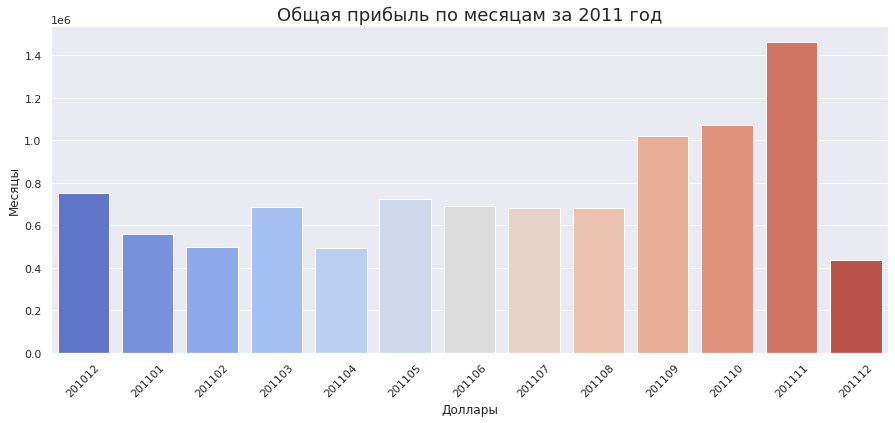

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=df_revenue.InvoiceYearMonth, y=df_revenue.Revenue, 
            data=df_revenue, 
            palette='coolwarm')
ax.set_title('Общая прибыль по месяцам за 2011 год', fontdict={'fontsize': 18})
plt.xticks(rotation=45)
plt.xlabel('Доллары')
plt.ylabel('Месяцы');

In [ ]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

## Ежемесячно Активность по Клиентам
Так как больше всего клиентов из UK, будем проверять активность по UK

In [ ]:
df_uk = df.query("Country=='United Kingdom'").reset_index(drop=True)
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
df_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


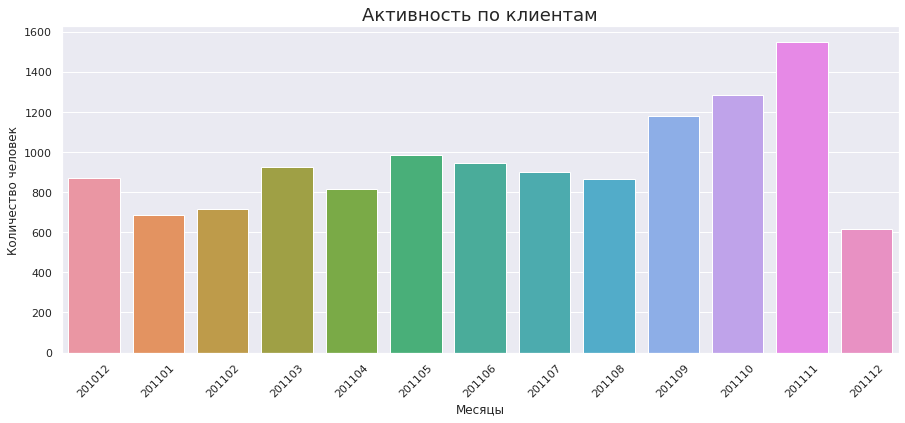

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=df_monthly_active.InvoiceYearMonth, y=df_monthly_active.CustomerID, 
            data=df_monthly_active, 
            )
ax.set_title('Активность по клиентам', fontdict={'fontsize': 18})
plt.xticks(rotation=45)
plt.xlabel('Месяцы')
plt.ylabel('Количество человек');

В апреле Ежемесячное число активных клиентов сократилось до 817 с 923 (-11,5%).

## Количество Ежемесячных Заказов

In [ ]:
df_monthly_sales = df_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
df_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


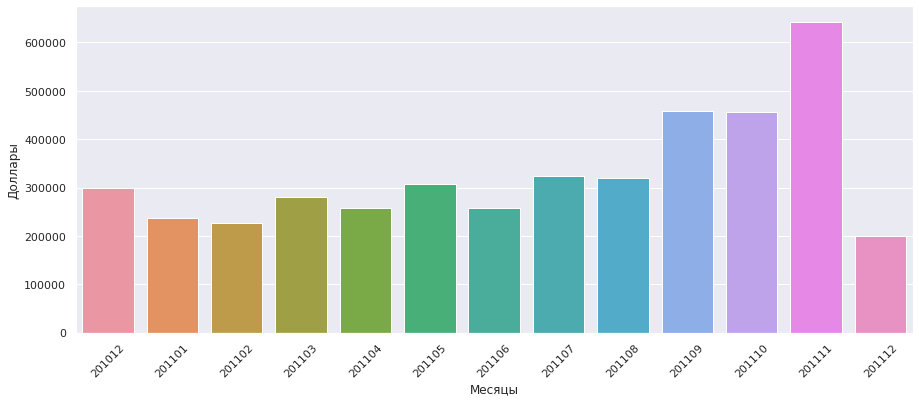

In [ ]:
plt.subplots(figsize=(15, 6))
sns.barplot(x=df_monthly_sales.InvoiceYearMonth, y=df_monthly_sales.Quantity, 
            data=df_monthly_sales, 
            )
ax.set_title('Общая прибыль по месяцам за 2011 год', fontdict={'fontsize': 18})
plt.xticks(rotation=45)
plt.xlabel('Месяцы')
plt.ylabel('Доллары');

In [ ]:
df.groupby('Country', as_index=False).agg({'Quantity':'sum', 'Revenue':'mean'}).sort_values(by='Quantity', ascending=False).head()

,Country,Quantity,Revenue
36,United Kingdom,4263829,16.525065
24,Netherlands,200128,120.059696
10,EIRE,142637,32.122599
14,Germany,117448,23.348943
13,France,110480,23.069288


## Средняя цена покупки по месяцам

In [ ]:
df_monthly_order_avg=df_uk.groupby('InvoiceYearMonth', as_index=False).agg({'Quantity':'sum', 'Revenue':'mean'})
df_monthly_order_avg

,InvoiceYearMonth,Quantity,Revenue
0,201012,298101,16.865860
1,201101,237381,13.614680
2,201102,225641,16.093027
3,201103,279843,16.716166
4,201104,257666,15.773380
5,201105,306452,17.713823
6,201106,258522,16.714748
7,201107,324129,15.723497
8,201108,319804,17.315899
9,201109,458490,18.931723


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



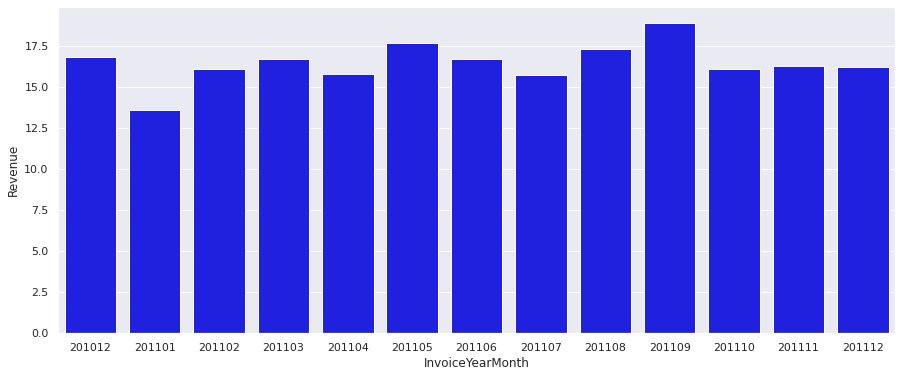

In [ ]:
plt.subplots(figsize=(15, 6))
sns.barplot('InvoiceYearMonth','Revenue', data=df_monthly_order_avg, color='Blue')

In [ ]:
df_monthly_sales = df_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
df_monthly_sales.head()

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



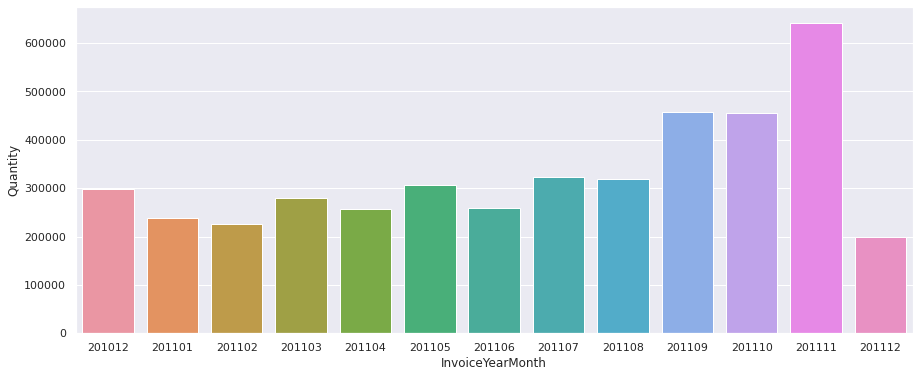

In [ ]:
plt.subplots(figsize=(15, 6))
sns.barplot('InvoiceYearMonth','Quantity', data=df_monthly_sales)

## Найдем новых пользователей

In [ ]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [ ]:
df.query("Country=='United Kingdom' and Quantity > 0" ).groupby(['Country','CustomerID'], as_index=False).agg({'Quantity':'sum', 'Revenue':'sum'}).sort_values(by='Quantity', ascending=False).head()

,Country,CustomerID,Quantity,Revenue
2599,United Kingdom,16446.0,80997,168472.50
0,United Kingdom,12346.0,74215,77183.60
3315,United Kingdom,17450.0,69993,194550.79
3357,United Kingdom,17511.0,64549,91062.38
3784,United Kingdom,18102.0,64124,259657.30


In [ ]:
df_min_purchase = df_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
df_min_purchase

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2010-12-05 15:38:00
2,12748.0,2010-12-01 12:48:00
3,12749.0,2011-05-10 15:25:00
4,12820.0,2011-01-17 12:34:00
...,...,...
3945,18280.0,2011-03-07 09:52:00
3946,18281.0,2011-06-12 10:53:00
3947,18282.0,2011-08-05 13:35:00
3948,18283.0,2011-01-06 14:14:00


In [ ]:
df_min_purchase.columns = ['CustomerID','MinPurchaseDate']
df_min_purchase

,CustomerID,MinPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2010-12-05 15:38:00
2,12748.0,2010-12-01 12:48:00
3,12749.0,2011-05-10 15:25:00
4,12820.0,2011-01-17 12:34:00
...,...,...
3945,18280.0,2011-03-07 09:52:00
3946,18281.0,2011-06-12 10:53:00
3947,18282.0,2011-08-05 13:35:00
3948,18283.0,2011-01-06 14:14:00


In [ ]:
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
df_min_purchase

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101
...,...,...,...
3945,18280.0,2011-03-07 09:52:00,201103
3946,18281.0,2011-06-12 10:53:00,201106
3947,18282.0,2011-08-05 13:35:00,201108
3948,18283.0,2011-01-06 14:14:00,201101


In [ ]:
df_uk = pd.merge(df_uk, df_min_purchase, on='CustomerID')
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [ ]:
df_uk['UserType'] = 'New'
df_uk.loc[df_uk['InvoiceYearMonth']>df_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New


In [ ]:
df_user_type_revenue = df_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()
df_user_type_revenue.head()

,InvoiceYearMonth,UserType,Revenue
0,201012,New,483799.74
1,201101,Existing,195275.51
2,201101,New,156705.77
3,201102,Existing,220994.63
4,201102,New,127859.00


In [ ]:
df_user_type_revenue = df_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
df_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


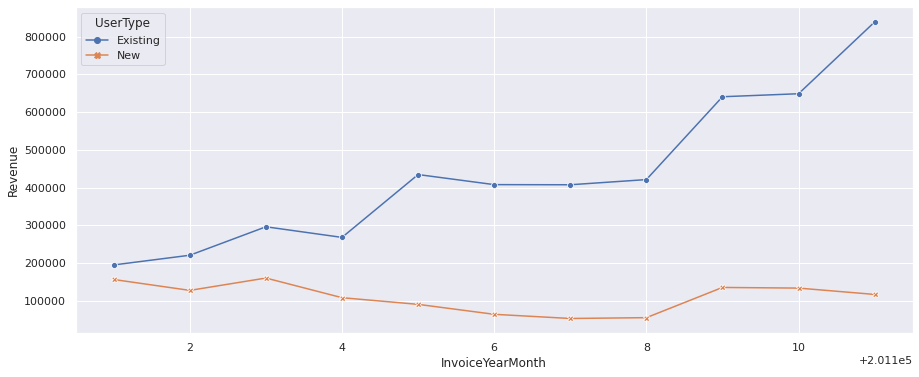

In [ ]:
plt.subplots(figsize=(15, 6))
sns.lineplot(
    data=df_user_type_revenue,
    x="InvoiceYearMonth", y="Revenue", hue="UserType", style="UserType",
    markers=True, dashes=False
)

Существующие клиенты демонстрируют положительную тенденцию и сообщают нам, что наша клиентская база растет, но у новых клиентов наблюдается небольшая отрицательная тенденция.

In [ ]:
df_user_ratio = df_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/df_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
df_user_ratio = df_user_ratio.reset_index()
df_user_ratio = df_user_ratio.dropna()
df_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


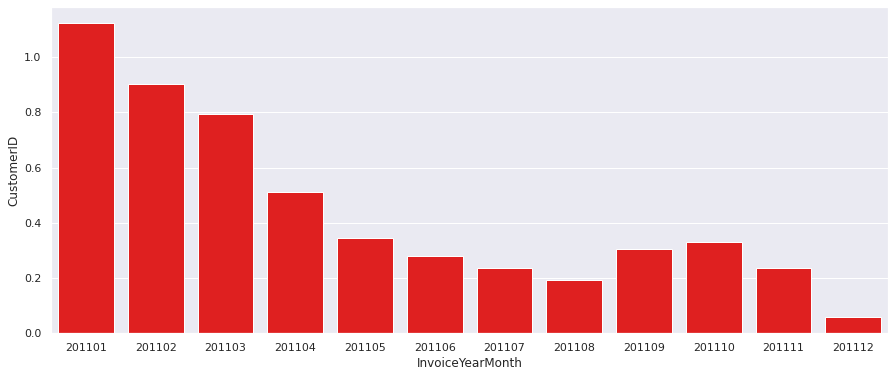

In [ ]:
plt.subplots(figsize=(15, 6))
sns.barplot(
    data=df_user_ratio,
    x="InvoiceYearMonth", y="CustomerID", color='red'
)

Соотношение новых клиентов снизилось, как и ожидалось (мы предполагали, что в феврале все клиенты были новыми) и составляет около 20%.

## Ежемесячная Норма Удержания
Уровень удержания следует очень внимательно отслеживать, поскольку он показывает, насколько привлекателен ваш сервис и насколько хорошо ваш продукт соответствует требованиям рынка. Чтобы визуализировать ежемесячный показатель удержания, нам нужно рассчитать, сколько клиентов сохранилось по сравнению с предыдущим месяцем.

**Ежемесячный Коэффициент Удержания** = *Удержанные Клиенты Из Предыдущих Месяцев* / *Активных Клиентов Всего*

In [ ]:
df_user_purchase = df_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
...,...,...,...
12325,18283.0,201110,114.65
12326,18283.0,201111,651.56
12327,18283.0,201112,208.00
12328,18287.0,201105,765.28


матрица удержания с помощью перекрестной таблицы

In [ ]:
df_retention = pd.crosstab(df_user_purchase['CustomerID'], df_user_purchase['InvoiceYearMonth']).reset_index()
df_retention

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1


Таблица удержания показывает нам, какие клиенты активны каждый месяц (1 означает активный).

С помощью простого цикла forдля каждого месяца мы рассчитываем Количество Сохраненных клиентов по сравнению с предыдущим месяцем и Общее количество клиентов

In [ ]:
months = df_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]>0) & (df_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

In [ ]:
df_retention = pd.DataFrame(retention_array)
df_retention['RetentionRate'] = df_retention['RetainedUserCount']/df_retention['TotalUserCount']
df_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


In [ ]:
df_retention = df_retention.query("InvoiceYearMonth != 201112	")

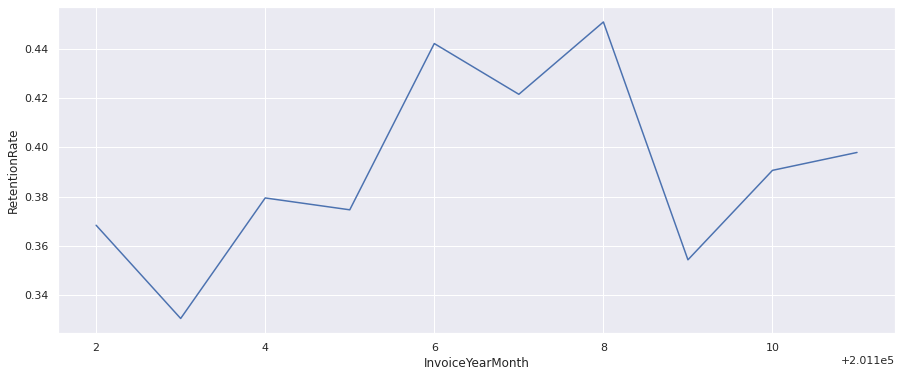

In [ ]:
plt.subplots(figsize=(15, 6))
sns.lineplot(
    data=df_retention,
    x="InvoiceYearMonth", y="RetentionRate",
    markers=True, dashes=False
)

Месячная норма удержания значительно подскочила с июня по август и впоследствии вернулась к предыдущим уровням.